Audification of a Physical Simulation:
=====================

Instead of looking online for a dataset, I decided to generate my own. This homework uses a simulation of a 1D wave equation (essentially a string), and uses this data for audification explorations. 

-----------------------------
Preamble:

In [1]:
%pylab inline
from scikits.audiolab import wavwrite
from scipy.signal import resample

Populating the interactive namespace from numpy and matplotlib


The following section explains how the dataset was generated. Skip below to Part B if you want to see the audification part.

# Part A: Writing a simulator for the 1D Wave equation 

The following function generates the simulation data for a stretched string. This was based on the descriptions found [here](http://mathcs.slu.edu/~chambers/fall09/cs145/wave-equation.pdf)

Parameters for the function:
* `mode` - Mode of vibration
* `freqL` - Frequency of oscillator on left end of string 
* `freqR` - Frequency of oscillator on right end of string
* `dx` - discrete length element's size
* `dt` - discrete time step size (seconds)
* `c` - Wave speed (Warning: Make sure c*dt/dx <0.49 for a stable system)
* `L` - Length of string
* `stopTime` - Stop time for the simulation in seconds

Additional Note: If both `freqL` and `freqR` are 0 (or unspecified), it simulates a plucked string depending with `mode` mode of vibration. 

The returned array has rows representing length and columns left to right represent the progression of time past to future.

In [2]:
class WaveSimulator1d:
    def __init__(self, mode = 1, freqL=0, freqR=0, dx = 0.01, dt = 0.01, c = 0.49, L = 10, stopTime = 30):
        self.mode = mode
        self.freqL=freqL
        self.freqR=freqR
        self.dx = dx
        self.dt = dt
        self.c = c
        self.L = L
        self.stopTime = stopTime

        self.runSimulation()
        
    def getPointIndex(self, point_on_string):
        """
        This function is used to get the index of a certain point on the string. 
        Input is a floating point number from 0-1 where 0=lefmost point, 1 = rightmost point on string. 
        """
        if(point_on_string >1.0 or point_on_string<0.0):
            print "Error, invalid point on string"
            return -1
        return int(simulator.L/simulator.dx*point_on_string)
        
    def resetParams(self):
        """
        Resets the parameters to default values.
        """
        self.mode = 1
        self.freqL=0
        self.freqR=0
        self.dx = 0.01
        self.dt = 0.01
        self.c = 0.49
        self.L = 10
        self.stopTime = 30
        
    def runSimulation(self):
        """
        Runs the simulation and returns an array containing the simulation results. 
        Size of the array is (length_steps, time_steps)
        """
        mode = self.mode
        freqL=self.freqL
        freqR=self.freqR
        dx = self.dx
        dt = self.dt
        c = self.c
        L = self.L
        stopTime = self.stopTime
        
        x = np.arange(0, L, dx)
        t = np.arange(0, stopTime, dt)

        r = c*dt/dx

        simulation = np.zeros((len(x), len(t)+2))

        def L_boundary(t, f):
            return 0.5*np.sin(2*np.pi*t*f)

        def R_boundary(t, f):
            return 0.5*np.sin(2*np.pi*t*f)

        # Apply initial conditions 
        if (freqL==0 and freqR==0):
            current_h = np.sin(mode*np.pi*x/L)
            past_h = current_h[:]
            simulation[:, 0] = past_h
            simulation[:, 1] = current_h
        else:
            simulation[0, 0] = L_boundary(0, f=freqL)
            simulation[-1, 0] = R_boundary(0, f=freqR)
            simulation[0, 1] = L_boundary(dt, f=freqL)
            simulation[-1, 1] = R_boundary(dt, f=freqR)

        x_range, t_range = simulation.shape 

        for t_n in range(1, t_range-1):
            # 'Rolled' vectors for ease of writing equation
            adjacent_right = np.roll(simulation[:, t_n], -1)[:]
            adjacent_left = np.roll(simulation[:, t_n], 1)[:]
            # Force boundary conditions on rolled vectors
            adjacent_right[-1] = simulation[-1, t_n]
            adjacent_left[0] = simulation[0, t_n]

            # Apply 1D Wave equation
            simulation[:, t_n+1] = r*r*(adjacent_right + adjacent_left) + ( 2*(1-r*r)*(simulation[:,t_n] ) ) - simulation[:,t_n-1]

            #Apply boundary conditions
            simulation[0, t_n+1] = L_boundary(t_n*dt, f=freqL)
            simulation[-1, t_n+1] = R_boundary(t_n*dt, f=freqR)

        return simulation

## Simulator Output Examples:

The simulator outputs an array of shape ($l_n$, $t_n$) where $l_n$ represents the excitation at different points on the string, and $t_n$ represents the progression of time. 

### Feature 1: Simulator in the Mode Mode
This simply simulates a plucked string at the requested mode of vibration

##### Mode 1

In [3]:
simulator = WaveSimulator1d(mode=1)

results = simulator.runSimulation()
print results.shape

(1000, 3002)


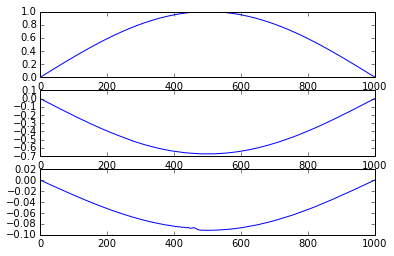

In [4]:
# String at initial, middle and end of simulation 
subplot(3,1,1), plot(results[:, 2])
subplot(3,1,2), plot(results[:, 1500])
subplot(3,1,3), plot(results[:, 3000])
show()

##### Mode 2

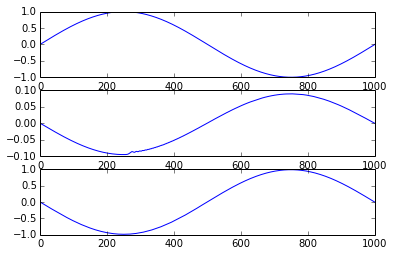

In [5]:
simulator.mode=2
results = simulator.runSimulation()

subplot(3,1,1), plot(results[:, 2])
subplot(3,1,2), plot(results[:, 1500])
subplot(3,1,3), plot(results[:, 3000])
show()

##### Mode 42

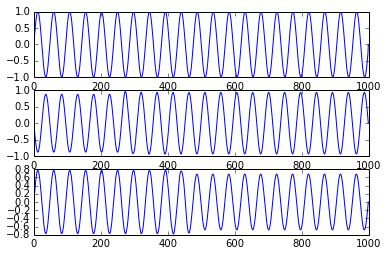

In [6]:
simulator.mode=42
results = simulator.runSimulation()

subplot(3,1,1), plot(results[:, 2])
subplot(3,1,2), plot(results[:, 1500])
subplot(3,1,3), plot(results[:, 3000])
show()

### Feature 2: Simulator with oscillators on either end of string
This simulates a 'jump rope' scenario where you have oscillators (a.k.a. people) moving the string up and down at the ends of the string. You need to specify what frequency you want them to move the string up and down on either end. 

When only one end is oscillating, the other end is treated as a fixed point.

##### On left end only 

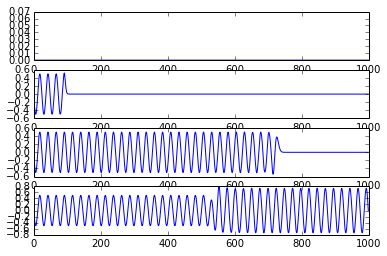

In [7]:
simulator.resetParams()
simulator.freqL=2
results = simulator.runSimulation()

subplot(4,1,1), plot(results[:, 2])
subplot(4,1,2), plot(results[:, 200])
subplot(4,1,3), plot(results[:, 1500])
subplot(4,1,4), plot(results[:, 3000])
show()

##### On right end only 

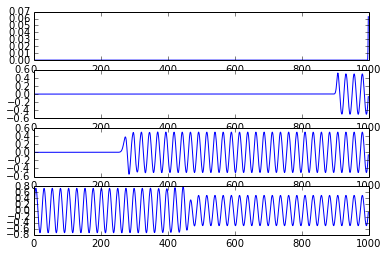

In [8]:
simulator.resetParams()
simulator.freqR=2
results = simulator.runSimulation()

subplot(4,1,1), plot(results[:, 2])
subplot(4,1,2), plot(results[:, 200])
subplot(4,1,3), plot(results[:, 1500])
subplot(4,1,4), plot(results[:, 3000])
show()

###### On both ends 


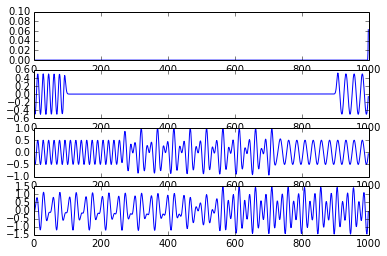

In [9]:
simulator.resetParams()
simulator.freqL=3
simulator.freqR=2
results = simulator.runSimulation()

subplot(4,1,1), plot(results[:, 2])
subplot(4,1,2), plot(results[:, 200])
subplot(4,1,3), plot(results[:, 1500])
subplot(4,1,4), plot(results[:, 3000])
show()

------------------

# Part B: Audification

This simulation dataset can be audified in two different ways. 
* Type 1: Fixed snapshot in time - audification of the whole string's 'state'
* Type 2: Fixed position on string - audification of that point's oscillations in time

Both of these will be explored.

-----------------

## Type 1: Fixed Snapshot in time
We will now produce the audifications of the above plotted snapshots. In order to do this, we will resample by a certain factor so that the duration of the audio is long enough to listen to.

(1000, 10002)


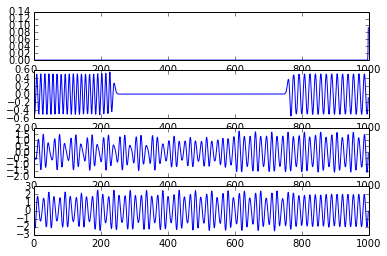

In [10]:
#Run simulation
simulator.resetParams()
simulator.freqL=4
simulator.freqR=3
simulator.dt = 0.01
simulator.stopTime = 100
results = simulator.runSimulation()

print results.shape

subplot(4,1,1), plot(results[:, 2])
subplot(4,1,2), plot(results[:, 500])
subplot(4,1,3), plot(results[:, 5000])
subplot(4,1,4), plot(results[:, 10000])
show()

In [11]:
# Get data
snap2 = results[:, 2]
snap200 = results[:, 200]
snap1500 = results[:, 1500]
snap3000 = results[:, 3000]

# Apply a time-stretch to get 3seconds of audio
dur = 3
sr = 44100

snap200 = resample(snap200, sr*dur)
snap1500 = resample(snap1500, sr*dur)
snap3000 = resample(snap3000, sr*dur)

snap200 = snap200*0.9/max(snap200)
snap1500 = snap1500*0.9/max(snap1500)
snap3000 = snap3000*0.9/max(snap3000)

wavwrite(snap200, 'snap200.wav', fs=sr)
wavwrite(snap1500, 'snap1500.wav', fs=sr)
wavwrite(snap3000, 'snap3000.wav', fs=sr)

#### Concatenated Snapshots

This concatenates all the snapshots throughout the simulation and plays it back as a continuous wavefile. 

In [12]:
concat_snaps = results.T.flatten()
print "Duration of playback: ", len(concat_snaps)/sr/60.0, " minutes"

Duration of playback:  3.76666666667  minutes


In [13]:
# 4minutes is too long. Resample to 10seconds. 
concat_snaps = resample(concat_snaps, 10*sr)
wavwrite(concat_snaps, 'snaps_concat.wav', fs=sr)

----------

## Type 2: Fixed point on the string

This is the sonification of the change in position of a fixed point on the string. We will reuse the same data from the previous run of the simulation. 

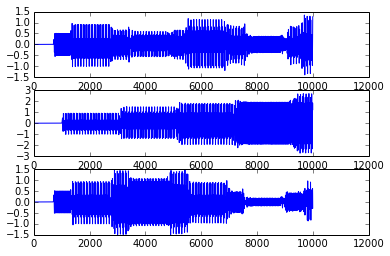

In [14]:
# Supply it with a fraction of the length (0=leftmost point, 1=right most point)
p35 = simulator.getPointIndex(0.35)
p50 = simulator.getPointIndex(0.50)
p65 = simulator.getPointIndex(0.65)

subplot(3,1,1), plot(results[p35, :])
subplot(3,1,2), plot(results[p50, :])
subplot(3,1,3), plot(results[p65, :])
show()

In [15]:
point35 = results[p35, :]
point50 = results[p50, :]
point65 = results[p65, :]

dur = 10
sr = 44100

point35 = resample(point35, dur*sr)
point50 = resample(point50, dur*sr)
point65 = resample(point65, dur*sr)

point35 = 0.9* point35/max(point35)
point50 = 0.9* point50/max(point50)
point65 = 0.9* point65/max(point65)

wavwrite(point35, 'point35.wav', fs=sr)
wavwrite(point50, 'point50.wav', fs=sr)
wavwrite(point65, 'point65.wav', fs=sr)

#### Stereo Projection 

We will now project these three positions using simple LCR panning to obtain a spatial image of the audification. In doing so, the left point on the string will be panned to the left channel, the middle point in the middle, and the rightmost point on the right. 

In [16]:
L_channel = point35 + 0.707*point50
R_channel = point65 + 0.707*point50

L_channel = L_channel*0.9 / max(L_channel)
R_channel = R_channel*0.9 / max(R_channel)

stereo_out = c_[L_channel, R_channel]

wavwrite(stereo_out, 'point_stereo.wav', fs=sr)

------------
### A note on additional sound processing:
Since the most of the audification results were infrasonic. All files except `snap_concat.wav` were transposed up by 2 octaves using the ReaPitch plug-in in the DAW `Reaper`. These files have names ending with `-pitch_shifted.wav`

### List of AudioFiles Generatated:

This notebook produces the following audiofiles:
Type 1: Snapshot in time
* snap200.wav
* snap1500.wav
* snap3000.wav
* snap_concat.wav
* snap200-pitch_shifted.wav
* snap1500-pitch_shifted.wav
* snap3000-pitch_shifted.wav

Type 2: Fixed point on string
* point35.wav
* point50.wav
* point65.wav
* point_stereo.wav
* point35-pitch_shifted.wav
* point50-pitch_shifted.wav
* point65-pitch_shifted.wav
* point_stereo-pitch_shifted.wav

All audiofiles can be obtained at: 
https://drive.google.com/file/d/0B7ReoGDIXK3RWGlxNjhRelJlSm8/view?usp=sharing

-------------------------------

Author: Akshay Cadambi (*akshay19.92@gmail.com*)

This was created as a part of the MAT 240F Sonification class in the *Media, Arts and Technology* Program at *UC Santa Barbara*